In [2]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders


import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix



In [3]:
# Path where our data is located

base_path = "C:/Users/Dell/Downloads/GSNSL/"

# Dictionary to save our 35 classes
categories = {  0: "क",
                1: "ख",
                2: "ग",
                3: "घ",
                4: "ङ",
                5: "च",
                6: "छ",
                7: "ज",
                8: "झ",
                9: "ञ",
                10: "ट",
                11: "ठ",
                12: "ड",
                13: "ढ",
                14: "ण",
                15: "त",
                16: "थ",
                17: "द",
                18: "ध",
                19: "न",
                20: "प",
                21: "फ",
                22: "ब",
                23: "भ",
                24: "म",
                25: "य",
                26: "र",
                27: "ल",
                28: "व",
                29: "श",
                30: "ष",
                31: "स",
                32: "ह",
                33: "क्ष",
                34: "त्र",
                35: "ज्ञ",

            }


def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# List containing all the filenames in the dataset
filenames_list = []
# List to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df

,filename,category
0,frame_7 - Copy.jpg,28
1,37 (5) - Copy.jpg,21
2,uydh (29).jpg,4
3,frame_28.jpg,19
4,37 (35) - Copy.jpg,26
...,...,...
27005,36 (37) - Copy.jpg,11
27006,36 (23) - Copy.jpg,19
27007,35 (22).jpg,35
27008,35 (1) - Copy - Copy.jpg,5


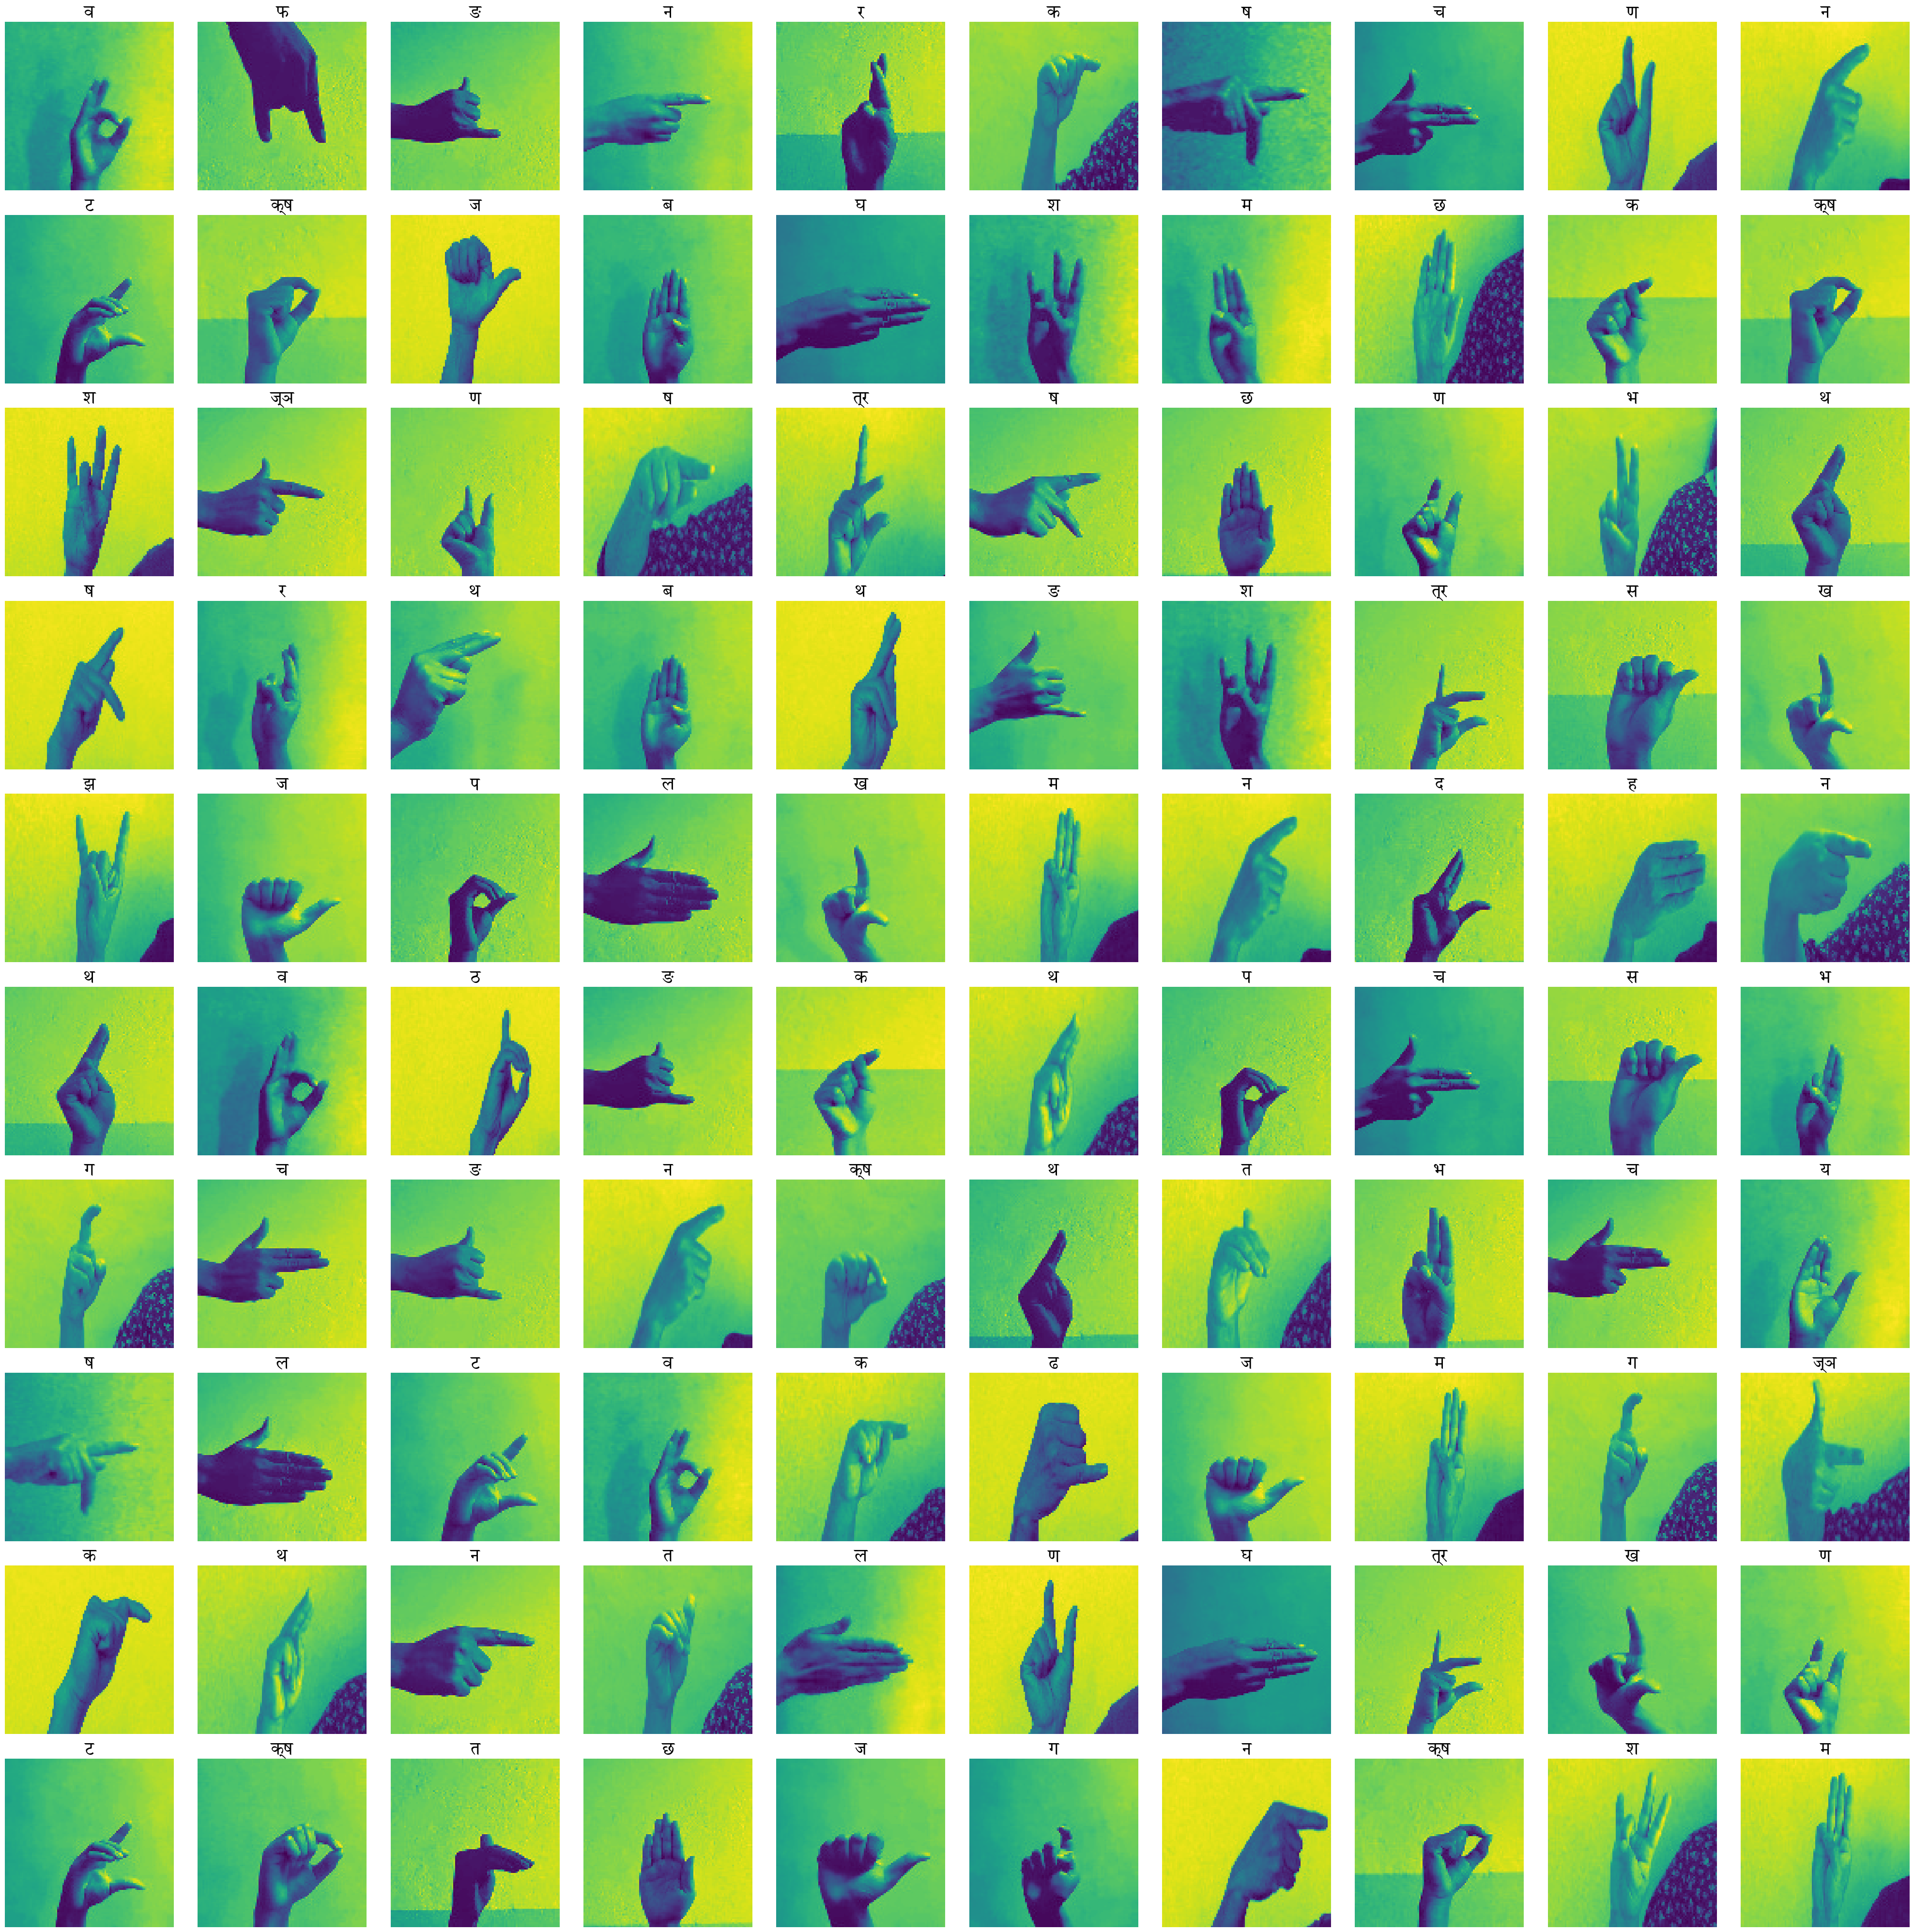

In [5]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import os

font_path = 'c:/Windows/Fonts/kokila.ttf'  # Replace with the actual file path of the Kokila font on your system
custom_font = FontProperties(fname=font_path, size=35)

plt.figure(figsize=(40, 40))

for i in range(100):
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10, 10, i + 1)

    # Title with custom 'Kokila' font for Nepali script
    plt.title(categories[df.category[i]], fontproperties=custom_font)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [11]:
splitfolders.ratio('C:/Users/Dell/Downloads/GSNSL/',output='C:/Users/Dell/Downloads/GSNSLdatasets/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 27010 files [02:17, 196.21 files/s]


In [6]:
datagen = ImageDataGenerator(rescale=1.0 / 255,
                            #  rotation_range=15,
                            #  width_shift_range=0.1,
                            #  height_shift_range=0.1,
                            #  shear_range=0.1,
                            #  zoom_range=0.1,
                            #  horizontal_flip=True,
                            #  fill_mode='nearest'
                             )


In [7]:
train_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/train/'
val_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/val/'
test_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/test/'

# Define hyperparameters and parameters
batch_size = 32
image_size = 100
img_channel = 1
num_classes = 36
learning_rate = 0.01


In [8]:
train_data = datagen.flow_from_directory(directory=train_path,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                         color_mode='grayscale',
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory=val_path,
                                       target_size=(image_size, image_size),
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='categorical')

test_data = datagen.flow_from_directory(directory=test_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='categorical',
                                        shuffle=False)

Found 21608 images belonging to 36 classes.
Found 2701 images belonging to 36 classes.
Found 2701 images belonging to 36 classes.


In [20]:
# # Define the CNN model
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(image_size, image_size, img_channel)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
# model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
# # Define a simple CNN model for smaller images
# simple_model = Sequential()
# simple_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
# simple_model.add(MaxPooling2D((2, 2)))
# simple_model.add(Conv2D(64, (3, 3), activation='relu'))
# simple_model.add(MaxPooling2D((2, 2)))
# simple_model.add(Conv2D(128, (3, 3), activation='relu'))
# simple_model.add(MaxPooling2D((2, 2)))
# simple_model.add(Flatten())
# simple_model.add(Dense(128, activation='relu'))
# simple_model.add(Dense(36, activation='softmax'))

# simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      640       
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 50, 50, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 128)       147584    
                                                      

In [21]:
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.6, verbose=1)


In [23]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10,
                    callbacks=[early_stopping, reduce_learning_rate],
                    verbose=1)

Epoch 1/10
676/676 [==============================] - 1952s 3s/step - loss: 3.5830 - accuracy: 0.0285 - val_loss: 3.5816 - val_accuracy: 0.0437 - lr: 0.0100
Epoch 2/10
676/676 [==============================] - 1974s 3s/step - loss: 3.5759 - accuracy: 0.0351 - val_loss: 3.5656 - val_accuracy: 0.0574 - lr: 0.0100
Epoch 3/10
676/676 [==============================] - 2031s 3s/step - loss: 3.5347 - accuracy: 0.0557 - val_loss: 3.4602 - val_accuracy: 0.1174 - lr: 0.0100
Epoch 4/10
676/676 [==============================] - 1952s 3s/step - loss: 3.3267 - accuracy: 0.0990 - val_loss: 3.0639 - val_accuracy: 0.2351 - lr: 0.0100
Epoch 5/10
676/676 [==============================] - 1953s 3s/step - loss: 2.8192 - accuracy: 0.1976 - val_loss: 2.2058 - val_accuracy: 0.4898 - lr: 0.0100
Epoch 6/10
676/676 [==============================] - 1957s 3s/step - loss: 1.6187 - accuracy: 0.5267 - val_loss: 0.3994 - val_accuracy: 0.9200 - lr: 0.0100
Epoch 7/10
676/676 [==============================] - 1972

In [24]:
model.save('GSNSLmodel.h5')


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from keras.models import load_model
model = load_model('C:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/GSNSLmodel.h5')
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.77323412895203
The Loss of the model for training data is: 0.007116675842553377
The accuracy of the model for validation data is: 99.7778594493866
The Loss of the model for validation data is: 0.006850279867649078


In [13]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

AttributeError: 'Sequential' object has no attribute 'model'

In [55]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 99.64608550071716
The Loss of the model for testing data is: 0.0256910752505064


In [56]:

p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 2534
Incorrect predicted classes: 9


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Pytho

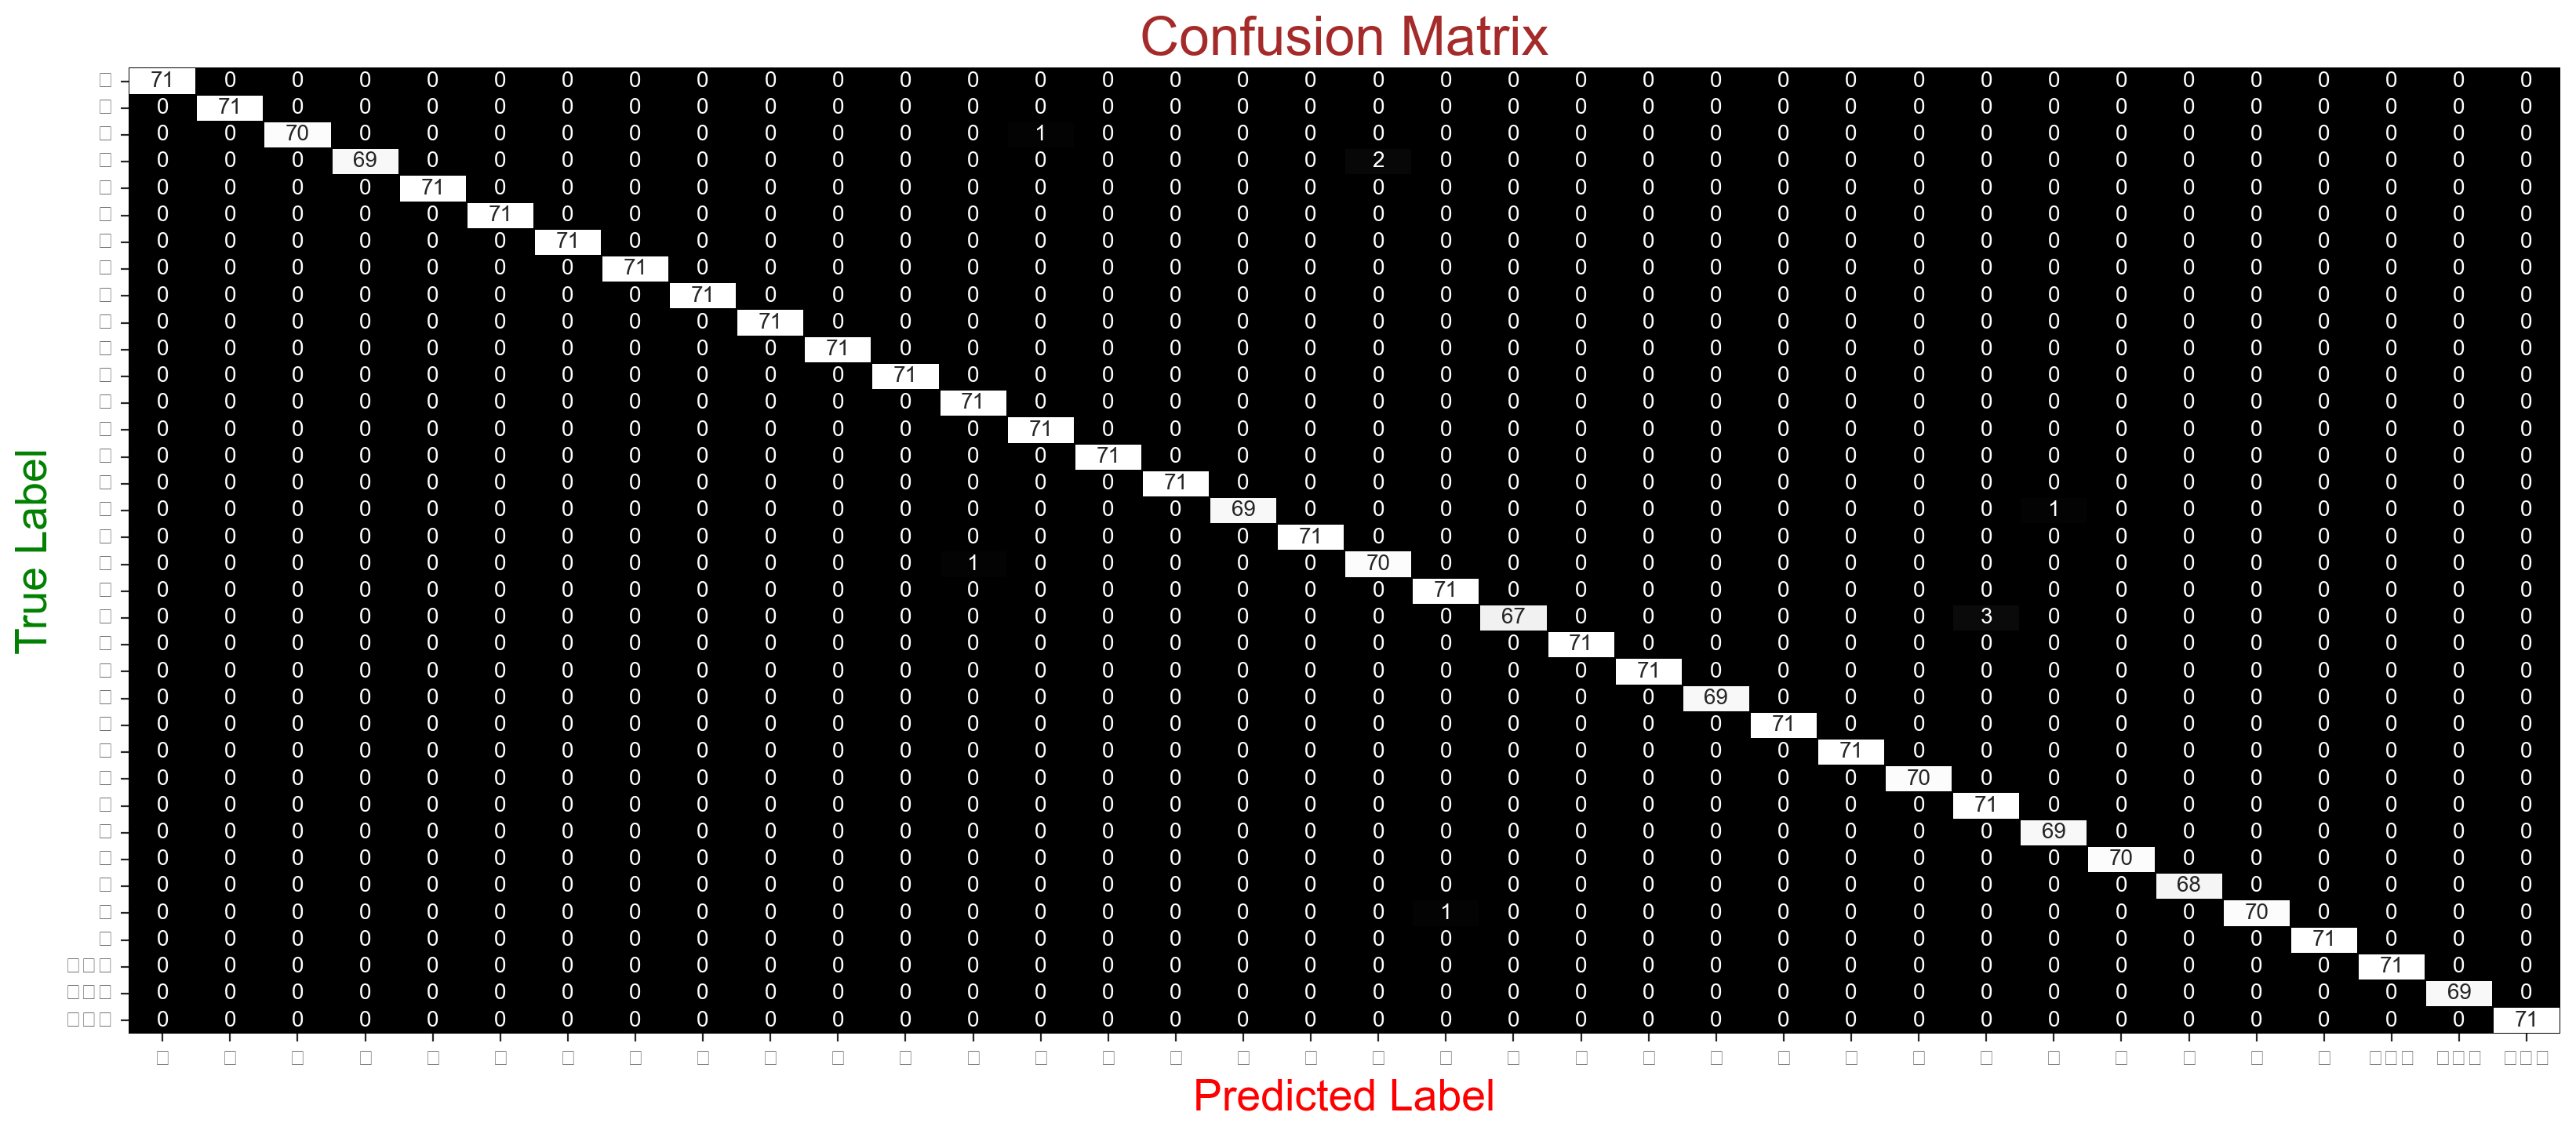

In [57]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.1, cmap = "gist_yarg_r", 
            linecolor="black", fmt='.0f', ax=ax, 
            cbar=False, xticklabels=categories.values(), 
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()








In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np

model = load_model('C:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/NSLmodel.h5')
labels = ["क","क्ष", "ख", "ग", "घ", "ङ", "च", "छ", "ज","ज्ञ", "झ", "ञ", "ट", "ठ", "ड", "ढ", "ण", "त", "त्र", "थ", "द", "ध", "न", "प", "फ", "ब", "भ", "म", "य", "र", "ल", "व", "श", "ष", "स", "ह"]

In [15]:
img_path = "C:/Users/Dell/OneDrive/Desktop/ka.jpg" # Replace 'path_to_your_input_image.jpg' with your actual image file
img = image.load_img(img_path, target_size=(100, 100))  # Adjust target_size as per your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image data if necessary

In [16]:
predictions = model.predict(img_array)



1/1 [==============================] - 0s 175ms/step


In [17]:
predicted_class_index = np.argmax(predictions, axis=1)[0]
print(predicted_class_index)
# Get the class label associated with the predicted index
predicted_class_label = labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

17
Predicted class: त
